# Avaliação 2 – Professor Thomas

### Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

### Importando o dataset

In [ ]:
df = pd.read_csv('test.csv')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Explorando os dados

In [ ]:
df.shape

(418, 11)

In [ ]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Sexo
sex_count = df.groupby('Sex')['Sex'].count()
print(sex_count)

Sex
female    152
male      266
Name: Sex, dtype: int64


In [ ]:
# Porto de Embarque
embarked_count = df.groupby('Embarked')['Embarked'].count()
print(embarked_count)

Embarked
C    102
Q     46
S    270
Name: Embarked, dtype: int64


### Feature Engineering

In [ ]:
## Dummy variables

## Sex: 0 for male | 1 for female
df['Sex'] = df['Sex'].map(lambda s :1  if s == 'female' else 0)
pd.unique(df['Sex'])

array([0, 1])

In [ ]:
## Embarked
dummy_embarked_df = pd.get_dummies(df['Embarked'])
dummy_embarked_df.columns

Index(['C', 'Q', 'S'], dtype='object')

In [ ]:
# Dummy trap
dummy_embarked_df.drop(columns='S', inplace = True)
dummy_embarked_df

,C,Q
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
413,0,0
414,1,0
415,0,0
416,0,0


In [ ]:
featured_df = pd.concat([df,dummy_embarked_df], axis=1)
featured_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0,0


In [ ]:
## Limpando colunas que não influenciam o modelo
featured_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace = True)
featured_df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,3,0,34.5,0,0,7.8292,0,1
1,3,1,47.0,1,0,7.0000,0,0
2,2,0,62.0,0,0,9.6875,0,1
3,3,0,27.0,0,0,8.6625,0,0
4,3,1,22.0,1,1,12.2875,0,0


## Dados faltantes 'Age' - Regressão

In [ ]:
# verificar valores nulos
featured_df.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
C          0
Q          0
dtype: int64

In [ ]:
featured_df = featured_df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'Age']]
featured_df.head(5)

,Pclass,Sex,SibSp,Parch,Fare,C,Q,Age
0,3,0,0,0,7.8292,0,1,34.5
1,3,1,1,0,7.0000,0,0,47.0
2,2,0,0,0,9.6875,0,1,62.0
3,3,0,0,0,8.6625,0,0,27.0
4,3,1,1,1,12.2875,0,0,22.0


In [ ]:
featured_df_no_age = featured_df[featured_df['Age'].isna()]
featured_df_no_age.shape

(86, 8)

In [ ]:
featured_df_with_age = featured_df.dropna(subset=['Age'])
featured_df_with_age.shape

(332, 8)

In [ ]:
X_age = featured_df_with_age.drop('Age', axis=1)
y_age = featured_df_with_age['Age']

In [ ]:
X_age.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,332.0,2.144578,0.846283,1.0,1.00,2.0,3.00000,3.0000
Sex,332.0,0.382530,0.486739,0.0,0.00,0.0,1.00000,1.0000
SibSp,332.0,0.481928,0.874084,0.0,0.00,0.0,1.00000,8.0000
Parch,332.0,0.397590,0.810651,0.0,0.00,0.0,1.00000,6.0000
Fare,331.0,40.982087,61.228558,0.0,8.05,16.0,40.63335,512.3292
C,332.0,0.246988,0.431911,0.0,0.00,0.0,0.00000,1.0000
Q,332.0,0.066265,0.249120,0.0,0.00,0.0,0.00000,1.0000


In [ ]:
X_age.isnull().sum()

Pclass    0
Sex       0
SibSp     0
Parch     0
Fare      1
C         0
Q         0
dtype: int64

In [ ]:
X_age = featured_df_with_age.drop('Fare', axis=1)

In [ ]:
X_age.isnull().sum()

Pclass    0
Sex       0
SibSp     0
Parch     0
C         0
Q         0
Age       0
dtype: int64

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state=42)

## Primeiro treinamento com modelo de base

In [ ]:
from sklearn.model_selection import train_test_split

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age, test_size=0.27, random_state=42)

In [ ]:
# Treinamento
random_forest.fit(X_train_age, y_train_age)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
# Predição
y_pred_age = random_forest.predict(X_test_age)

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_age, y_pred_age)
print('MAE: ', mae)

MAE:  0.22229000000000024


## Grid Search para encontrar os parâmetros do melhor modelo

In [ ]:
from sklearn.model_selection import GridSearchCV

random_forest_tuning = RandomForestRegressor(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 500, 800, 1000],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['mae'],
    'bootstrap': [True, False]
}

In [ ]:
grid_search = GridSearchCV(estimator=random_forest_tuning, 
                           param_grid=param_grid, 
                           cv=3,
                          verbose=1,
                          n_jobs=-1)

In [ ]:
grid_search.fit(X_train_age, y_train_age)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   56.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
# Visualizando os melhores parametros
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'mae',
 'max_features': 'auto',
 'n_estimators': 1000}

In [ ]:
# Escolhendo o melhor modelo encontrado
# best_estimator_ é o modelo treinado com as melhores configurações, encontrado no GridSearch
best_random_forest = grid_search.best_estimator_

In [ ]:
# Predição
y_pred_best_age = best_random_forest.predict(X_test_age)

In [ ]:
mae = mean_absolute_error(y_test_age, y_pred_best_age)
print('MAE: ', mae)

MAE:  8.70786518134715


In [ ]:
best_random_forest.score(X_age, y_age)

0.6104168337589894

## Predição da idade dos dados faltantes

In [ ]:
X_no_age = featured_df_no_age.drop('Age', axis=1)
y_no_age = featured_df_no_age['Age']

In [ ]:
y_pred_no_age = best_random_forest.predict(X_no_age)

In [ ]:
type(y_pred_no_age)

numpy.ndarray

In [ ]:
df_pred_age = X_no_age
df_pred_age['Age'] = y_pred_no_age.tolist()
df_pred_age.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,C,Q,Age
5,0,3,0,0,0,8.4583,0,1,40.56000
17,1,2,0,0,0,13.0000,0,0,34.53366
19,1,3,1,0,0,7.2250,1,0,16.47650
26,0,3,0,0,0,7.2250,1,0,35.25400
28,1,3,1,0,0,7.8792,0,1,19.82300


In [ ]:
# Concatenando os dataframes
df_for_class = pd.concat([featured_df_with_age, df_pred_age], ignore_index=True)

df_for_class

,Survived,Pclass,Sex,SibSp,Parch,Fare,C,Q,Age
0,0,3,0,1,0,7.2500,0,0,22.0000
1,1,1,1,1,0,71.2833,1,0,38.0000
2,1,3,1,0,0,7.9250,0,0,26.0000
3,1,1,1,1,0,53.1000,0,0,35.0000
4,0,3,0,0,0,8.0500,0,0,35.0000
...,...,...,...,...,...,...,...,...,...
886,0,3,0,0,0,7.2292,1,0,27.2850
887,0,3,1,8,2,69.5500,0,0,11.6590
888,0,3,0,0,0,9.5000,0,0,25.9755
889,0,3,0,0,0,7.8958,0,0,26.3810


In [ ]:
df_results.to_csv('results_rf.csv')

## Classification for Survived

In [ ]:
X = df_for_class.drop('Survived', axis=1)
y = df_for_class['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()

In [ ]:
#Treinando o modelo
model_LR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_LR = model_LR.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

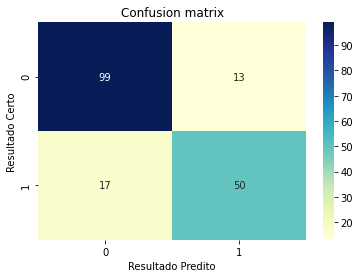

In [ ]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_LR)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [ ]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       112
           1       0.79      0.75      0.77        67

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



### KNN - K Nearest Neighborhood

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {0:.3f} % and k = {1}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 99.017 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {0:.3f} % and k = {1}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 73.184 % and k = [3]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


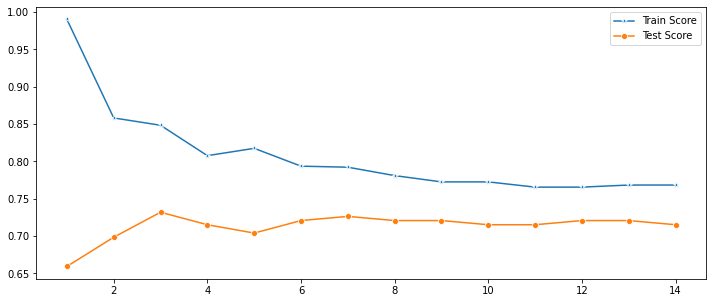

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(6)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7206703910614525

Text(0.5, 15.0, 'Resultado Predito')

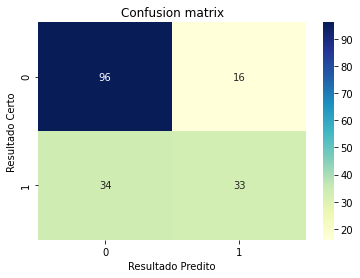

In [ ]:
#Confusion Matrix

y_pred_knn = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79       112
           1       0.67      0.49      0.57        67

    accuracy                           0.72       179
   macro avg       0.71      0.67      0.68       179
weighted avg       0.71      0.72      0.71       179



### SVM - Support Vector Machines

In [ ]:
from sklearn.svm import SVC

model_svc = SVC(kernel='poly')

In [ ]:
model_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svc = model_svc.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

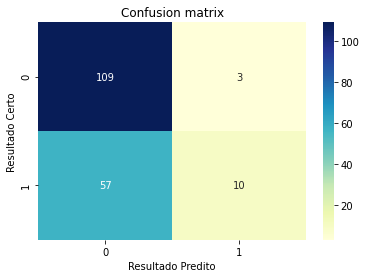

In [ ]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.66      0.97      0.78       112
           1       0.77      0.15      0.25        67

    accuracy                           0.66       179
   macro avg       0.71      0.56      0.52       179
weighted avg       0.70      0.66      0.58       179



### Kernel SVM

In [ ]:
from sklearn.svm import SVC

# usando kernel polinomial
model_svc_kernel = SVC(kernel='rbf', gamma = 0.1)

In [ ]:
model_svc_kernel.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svc_kernel = model_svc_kernel.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

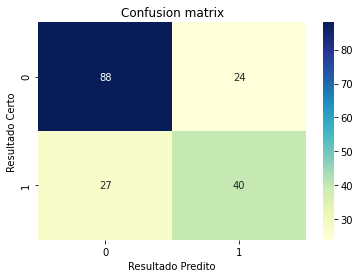

In [ ]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svc_kernel)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [ ]:
print(classification_report(y_test, y_pred_svc_kernel))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       112
           1       0.62      0.60      0.61        67

    accuracy                           0.72       179
   macro avg       0.70      0.69      0.69       179
weighted avg       0.71      0.72      0.71       179



### Naive Bays

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_naive_bays = GaussianNB()

In [ ]:
model_naive_bays.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_naive_bays = model_naive_bays.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

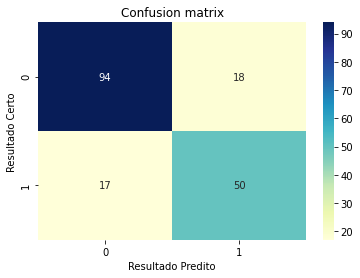

In [ ]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_naive_bays)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [ ]:
print(classification_report(y_test, y_pred_naive_bays))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       112
           1       0.74      0.75      0.74        67

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



### Decision Tree (Classification)

In [ ]:
from sklearn import tree
model_dtc = tree.DecisionTreeClassifier()

In [ ]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_dtc = model_dtc.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

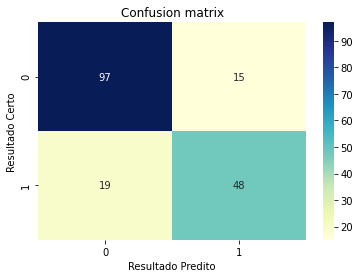

In [ ]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dtc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [ ]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       112
           1       0.76      0.72      0.74        67

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



### Random Forest (Classification)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()

In [ ]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rfc = model_rfc.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

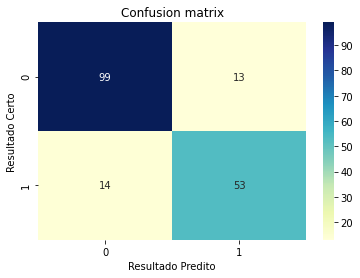

In [ ]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rfc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       112
           1       0.80      0.79      0.80        67

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



Text(0, 0.5, 'Testing Accuracy')

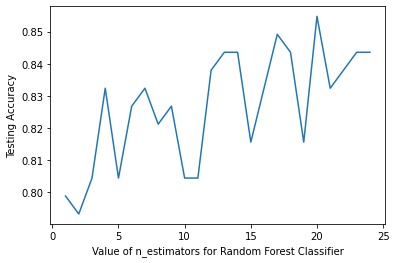

In [ ]:
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 25):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred_rf_new = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_rf_new))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 25), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [ ]:
test = model_rfc.predict